In [19]:
%config InlineBackend.figure_format='retina'

In [25]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

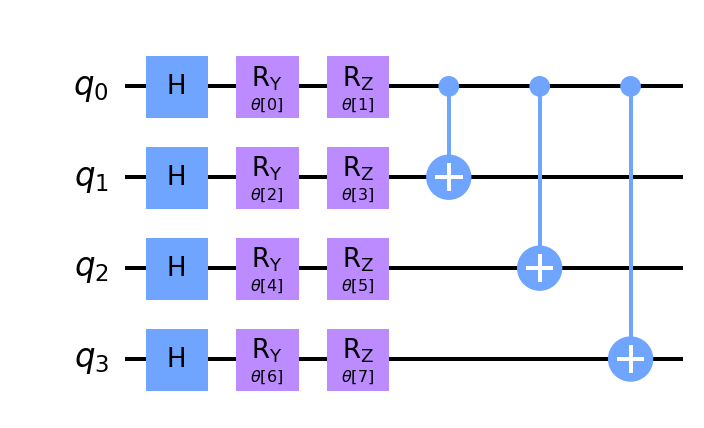

In [4]:
# specifying number of qubits for the quantum circuit
Num = 4
# create a quantum circuit (qc) object
qc = QuantumCircuit(Num)
# create all parameters inside the qc 
x = ParameterVector(r'$\theta$', length=8)
# add hadamard gate to each qubit
[qc.h(i) for i in range(Num)]  
# add parametrised gates
[qc.ry(x[int(2*i)], i) for i in range(Num)]
# add parametrised gates
[qc.rz(x[int(2*i+1)], i) for i in range(Num)]
# add controlled gates
qc.cx(0, range(1, Num))
circ = qc
circ.draw("mpl")


In [21]:
from pqc import Simulation
import inspect
lines = inspect.getsource(Simulation)
print(lines)

class Simulation(Multiprocess):
    
    def __init__(self,circ=None,samples:int=10,num_proc:int=1):
        Multiprocess.__init__(self,circ,samples,num_proc)
        self.thetas,self.phis = self.get_params()
        
    def simulate(self,theta):
        circuit =  self._circ.assign_parameters(theta)
        circuit.snapshot("final", snapshot_type="statevector")
        result = qiskit.execute(
            circuit, qiskit.Aer.get_backend("aer_simulator_statevector")
        ).result()
        result_data = result.data(0)["snapshots"]["statevector"]["final"][0]

        return result_data
    
    def get_params(self) -> typing.Tuple[typing.List, typing.List]:
        """Generate parameters for the calculation of expressibility
        :returns theta (np.array): first list of parameters for the parameterized quantum circuit
        :returns phi (np.array): second list of parameters for the parameterized quantum circuit
        """
        #np.random.seed(1234)
        theta = [
       

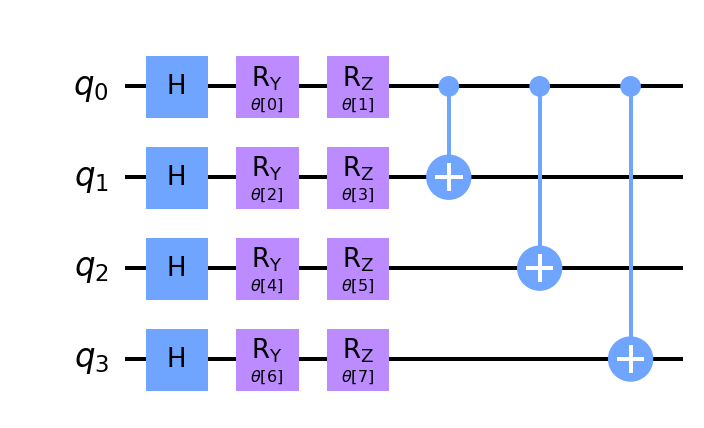

In [26]:
circ.draw("mpl")

In [27]:
theta = [
    {p: 2 * np.random.random() * np.pi for p in circ.parameters}
    for _ in range(100)
]
#np.random.seed(1234)
phi = [
    {p: 2 * np.random.random() * np.pi for p in circ.parameters}
    for _ in range(100)
]

In [34]:
def simulate(circ,theta):
    circuit =  circ.assign_parameters(theta)
    circuit.snapshot("final", snapshot_type="statevector")
    result = qiskit.execute(
        circuit, qiskit.Aer.get_backend("aer_simulator_statevector")
    ).result()
    print(result)
    result_data = result.data(0)["snapshots"]["statevector"]["final"][0]

    return result_data    

In [35]:
simulate(circ,theta[0])

Result(backend_name='aer_simulator_statevector', backend_version='0.9.1', qobj_id='3b1b7911-7d0d-488a-ba90-a1f5dd1a1c25', job_id='98e87029-9823-4a95-911c-9eb760610745', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(snapshots={'statevector': {'final': [array([ 4.37679090e-03-8.29706137e-03j,  1.13078793e-02+2.14362921e-02j,
       -3.16364679e-04-1.20420275e-03j, -4.63979338e-02+1.76607956e-01j,
       -3.58094845e-03-3.10957683e-03j, -3.61953749e-02+3.14308627e-02j,
       -6.29240014e-04+1.71598843e-05j, -3.61041089e-01-9.84588262e-03j,
       -3.79439829e-03-1.79055769e-03j, -4.90047699e-02+2.31251073e-02j,
       -5.31769745e-04+1.65319265e-04j, -3.89856114e-01-1.21200439e-01j,
       -1.31817658e-03+1.66191988e-03j, -6.66037490e-02-8.39721297e-02j,
        2.01876506e-05+2.80816999e-04j,  5.79023448e-02-8.05441061e-01j])]}}), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=5.197802371787593, memory

array([ 4.37679090e-03-8.29706137e-03j,  1.13078793e-02+2.14362921e-02j,
       -3.16364679e-04-1.20420275e-03j, -4.63979338e-02+1.76607956e-01j,
       -3.58094845e-03-3.10957683e-03j, -3.61953749e-02+3.14308627e-02j,
       -6.29240014e-04+1.71598843e-05j, -3.61041089e-01-9.84588262e-03j,
       -3.79439829e-03-1.79055769e-03j, -4.90047699e-02+2.31251073e-02j,
       -5.31769745e-04+1.65319265e-04j, -3.89856114e-01-1.21200439e-01j,
       -1.31817658e-03+1.66191988e-03j, -6.66037490e-02-8.39721297e-02j,
        2.01876506e-05+2.80816999e-04j,  5.79023448e-02-8.05441061e-01j])

In [5]:
import qiskit

qiskit.__version__

'0.18.3'

In [6]:
from pqc import analyse

In [3]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.3926556682057455, entanglement is: 0.39003293583904786


In [7]:
from pqc import FeatureMap

In [8]:
fm = FeatureMap()

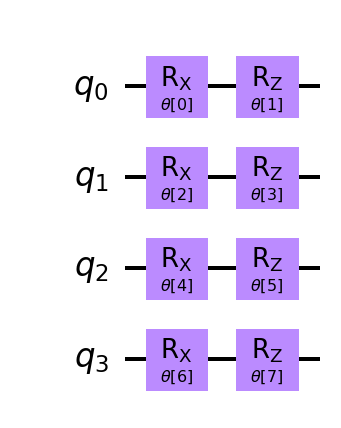

In [11]:
circ1 = fm.circuit1()
circ1.draw("mpl")

In [12]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ1,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.4600580960520182, entanglement is: -1.1102230246251566e-17


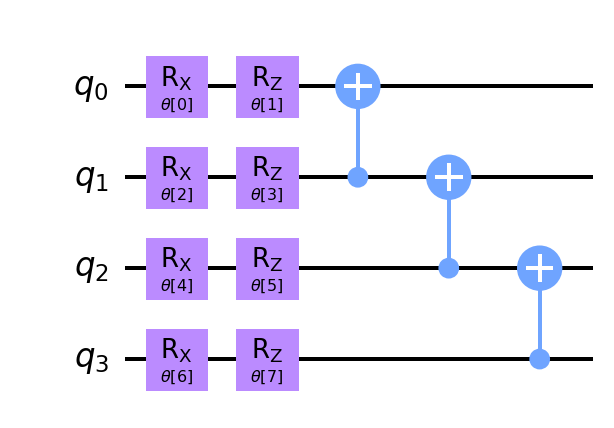

In [13]:
circ2 = fm.circuit2()
circ2.draw("mpl")

In [14]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ2,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.5175896707149611, entanglement is: 0.571885029378331


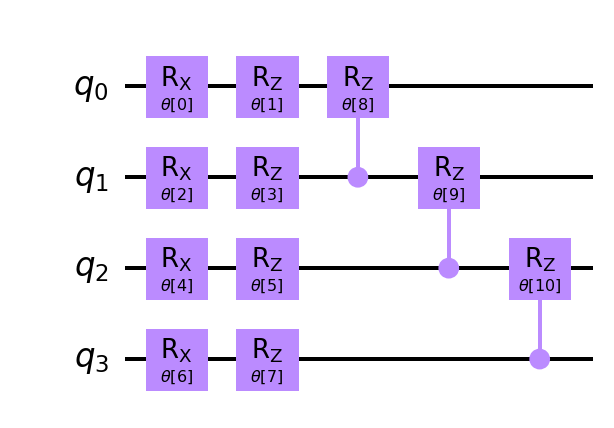

In [15]:
circ3 = fm.circuit3()
circ3.draw("mpl")

In [16]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ3,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.8673855521973931, entanglement is: 0.15675411760063893


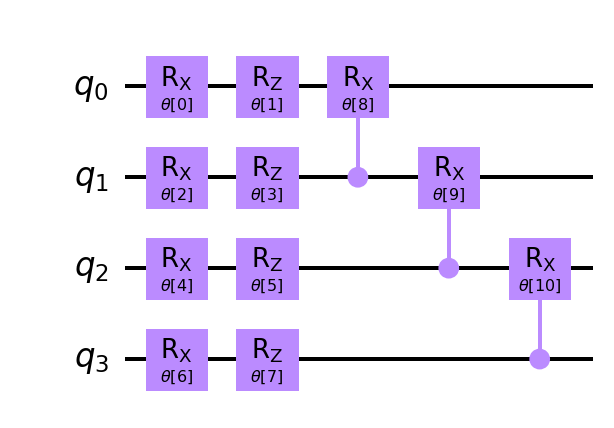

In [17]:
circ4 = fm.circuit4()
circ4.draw("mpl")

In [18]:
# put qc inside the analyse module to get the descriptor values
exp, ent = analyse(circ=circ4,samples=100,descriptor='both',num_proc=4)
# print results
print("expressibility is: {}, entanglement is: {}".format(exp,ent))

expressibility is: 0.5817899345822842, entanglement is: 0.2957346121619664


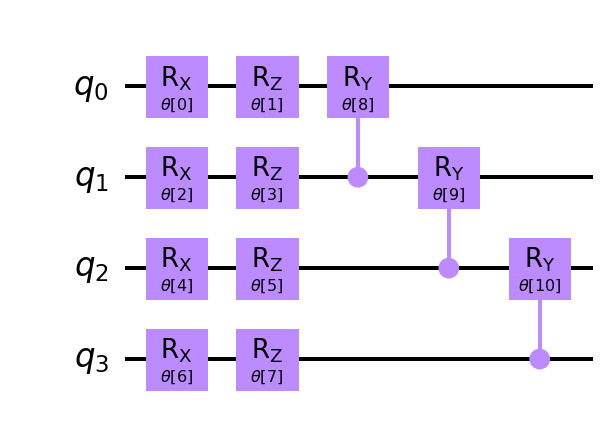

In [9]:
circ5 = fm.circuit5()
circ5.draw("mpl")

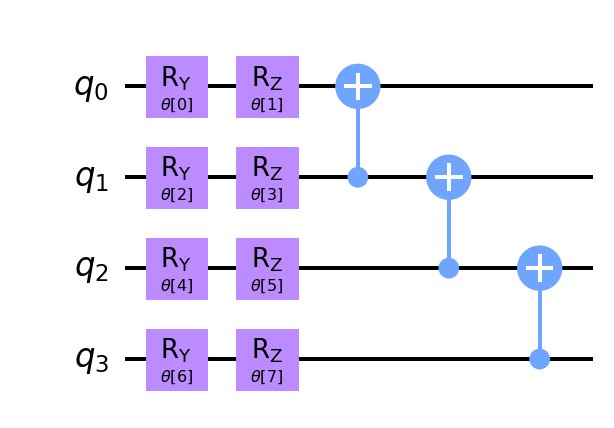

In [10]:
circ6 = fm.circuit6()
circ6.draw("mpl")

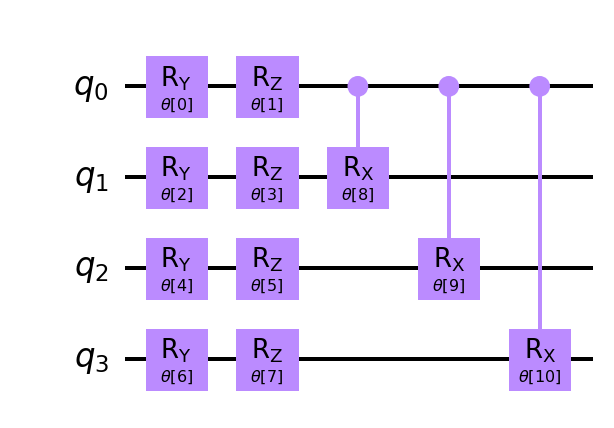

In [11]:
circ7 = fm.circuit7()
circ7.draw("mpl")

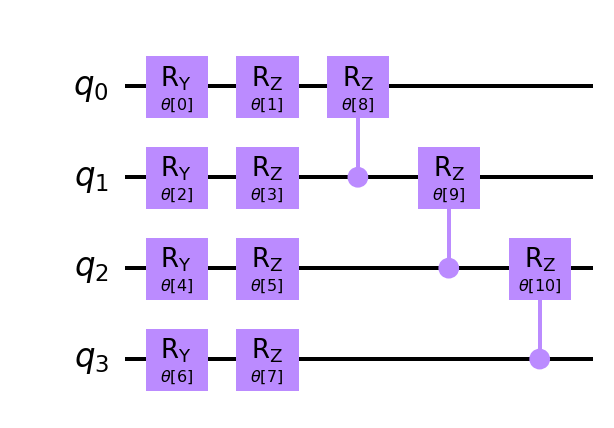

In [12]:
circ8 = fm.circuit8()
circ8.draw("mpl")

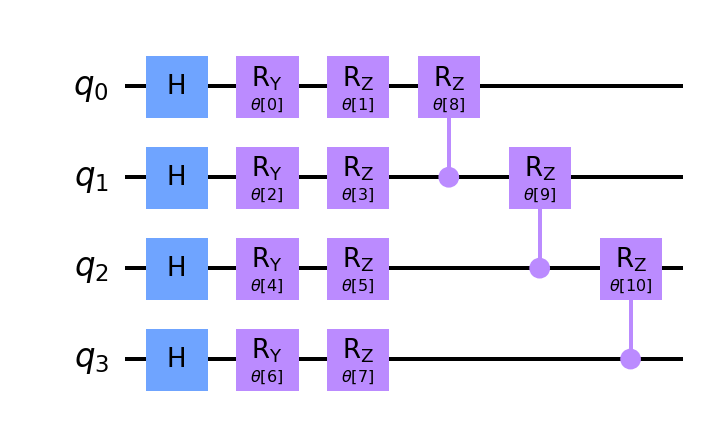

In [13]:
circ9 = fm.circuit9()
circ9.draw("mpl")

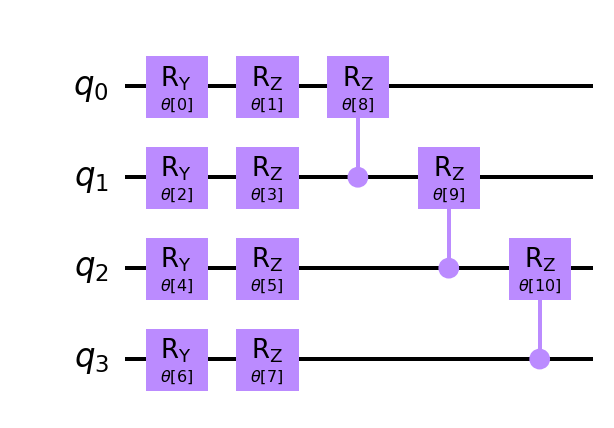

In [14]:
circ10 = fm.circuit10()
circ10.draw("mpl")

/Users/tardis/anaconda3/envs/py39/lib/python3.9/site-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


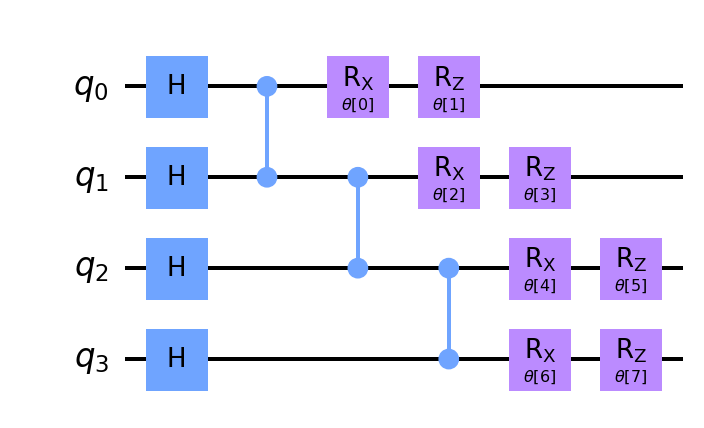

In [43]:
circ11 = fm.circuit11()
circ11.draw("mpl")

In [16]:
Circ = [circ1,circ2,circ3,circ4,circ5,circ6,circ7,circ8,circ9,circ10]
Exp = []
Ent = []
for qc in Circ:
    
    ana = Analyser(circ=qc,samples=100,num_proc=4)
    # print results
    exp = ana.get_expressibility()
    ent = ana.get_entanglement()
    print("expressibility is: {}, entanglement is: {}".format(exp,ent))
    Exp.append(exp)
    Ent.append(ent)


expressibility is: 0.8711962891895288, entanglement is: -1.9984014443252817e-17
expressibility is: 0.5789654810904473, entanglement is: 0.5570298814477779
expressibility is: 0.3822923935897914, entanglement is: 0.16728692583027957
expressibility is: 0.23665953063156442, entanglement is: 0.2758224404409883
expressibility is: 0.20320249399406137, entanglement is: 0.2821517765414951
expressibility is: 0.38893187724316564, entanglement is: 0.509447775616546
expressibility is: 0.3106678331734818, entanglement is: 0.21517643205471018
expressibility is: 0.5851023681470084, entanglement is: 0.16997581973360823
expressibility is: 0.42594492593522965, entanglement is: 0.19159946601461367
expressibility is: 0.5909355396076972, entanglement is: 0.17679940345091227


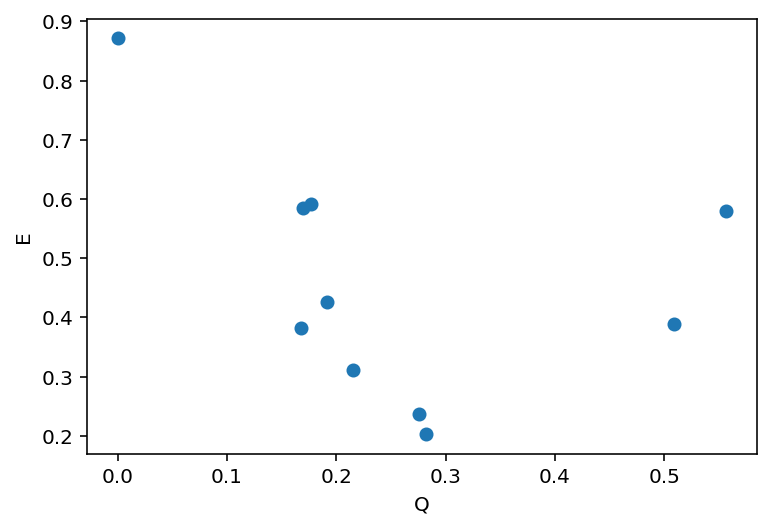

In [17]:
import matplotlib.pyplot as plt

plt.scatter(Ent,Exp)
plt.xlabel("Q")
plt.ylabel("E")
plt.show()

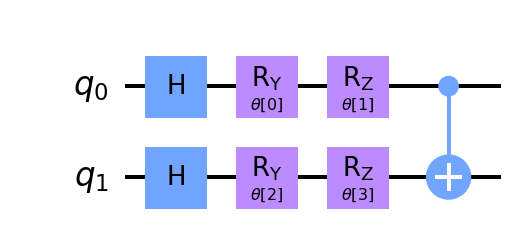

In [18]:
Num = 2
# create a quantum circuit (qc) object
qc = QuantumCircuit(Num)
# create all parameters inside the qc 
x = ParameterVector(r'$\theta$', length=8)
# add hadamard gate to each qubit
[qc.h(i) for i in range(Num)]  
# add parametrised gates
[qc.ry(x[int(2*i)], i) for i in range(Num)]
# add parametrised gates
[qc.rz(x[int(2*i+1)], i) for i in range(Num)]
# add controlled gates
qc.cx(0, range(1, Num))
circ = qc
circ.draw("mpl")

In [19]:
import numpy as np
samples = 10
theta = [
    {p: 2 * np.random.random() * np.pi for p in circ.parameters}
    for _ in range(samples)
]
phi = [
    {p: 2 * np.random.random() * np.pi for p in circ.parameters}
    for _ in range(samples)
]



In [20]:
import qiskit

def simulate(circ,theta):
    circuit =  circ.assign_parameters(theta)
    circuit.snapshot("final", snapshot_type="statevector")
    result = qiskit.execute(
        circuit, qiskit.Aer.get_backend("aer_simulator_statevector")
    ).result()
    result_data = result.data(0)["snapshots"]["statevector"]["final"][0]
    print(result_data,len(result_data))
    return result_data
    

In [21]:
simulate(circ,theta[0])

[-1.42294995e-02-0.9954594j  -2.04508260e-05+0.00143069j
  2.46118735e-03+0.01514345j  1.48946158e-02-0.09164515j] 4


array([-1.42294995e-02-0.9954594j , -2.04508260e-05+0.00143069j,
        2.46118735e-03+0.01514345j,  1.48946158e-02-0.09164515j])

In [22]:
ana.__dict__.keys()

dict_keys(['_circ', '_num_qubits', '_samples', '_num_params', '_num_proc', 'thetas', 'phis', 'theta_circuits', 'phi_circuits', '_method_ex', '_method_ec'])

In [36]:
from sklearn.datasets import load_wine,load_breast_cancer


In [37]:
data = load_breast_cancer()


In [38]:
data.data.shape


(569, 30)

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



len_0 = len(data.target[data.target==0])
len_1 = len(data.target[data.target==1])
new_len = np.min([len_0,len_1])

newtarget = np.hstack((data.target[:new_len],data.target[len_1:len_1+new_len]))
pca = PCA(n_components=2)
scaler = StandardScaler()
features = pca.fit_transform(data.data)
features = scaler.fit_transform(features)
newdata = np.vstack((features[:new_len],features[len_1:len_1+new_len]))
data0 = np.column_stack((newtarget.reshape(len(newtarget),1),newdata[:,:3]))

In [136]:
def feature_map_expr7(reps=2, num_qubits=3): 
    feature_map = QuantumCircuit(num_qubits)
    x = ParameterVector('x', length=num_qubits)

    for _ in range(reps):
        for i in range(num_qubits):
            feature_map.ry(x[i], i)
        feature_map.cx(num_qubits-1, 0)
        for i in range(num_qubits-1):
            feature_map.cx(i, i+1)
        for i in range(num_qubits):
            feature_map.ry(x[i], i)
        feature_map.cx(num_qubits - 1, num_qubits - 2)
        feature_map.cx(0, num_qubits - 1)
        for i in range(1, num_qubits - 1):
            feature_map.cx(i, i-1)
    return feature_map 

feature_map = feature_map_expr7(2,4)

In [137]:
var_circuit = EfficientSU2(4, entanglement='linear', reps=2)   

In [138]:
class DataSet(object):

    """Docstring for CrossValidation. """

    def __init__(self, data, k=None, A=0, B=1):
        """TODO: to be defined. """
        self.data = data.copy()
        self.k = k
        self.A = A
        self.B = B
        #self.C = C
        self.dataA = self.data[self.data[:,0]==self.A]
        self.dataB = self.data[self.data[:,0]==self.B]
        #self.dataC = self.data[self.data[:,0]==self.C]

    def CV(self, data):
        k = self.k
        size = len(data)
        index = np.arange(size)
        np.random.shuffle(index)
        DATA_IND={}
        ind_split = np.array_split(index, k)
        for name in range(k):
            sub = {}
            train_split = []
            for i in range(k):
                if i==name:
                    sub['test_ind'] = ind_split[i]
                else:
                    train_split.append(ind_split[i])
            sub['train_ind'] = np.hstack(train_split)
            DATA_IND.update({name: sub})
        return DATA_IND, index
    
    def data_gen(self):
        ind, _ = self.CV(self.dataA)
        for i in range(self.k):
            tr_input = {
                'A': self.dataA[ind[i]['train_ind']][:,1:],
                'B': self.dataB[ind[i]['train_ind']][:,1:]}
            te_input = {
                'A': self.dataA[ind[i]['test_ind']][:,1:],
                'B': self.dataB[ind[i]['test_ind']][:,1:]}
            te_label = (self.dataA[ind[i]['test_ind']][:,:1],
                        self.dataB[ind[i]['test_ind']][:,:1])
            yield {
                'k': i,
                'tr_input': tr_input, 
                'te_input': te_input,
                'testing_input': np.concatenate((te_input['A'], te_input['B'])),
                'testing_label': np.concatenate(te_label)
                  }



In [139]:
ind0 = np.arange(len(data0))[data0[:,0] == 0]
ind1 = np.arange(len(data0))[data0[:,0] != 0]
totnum = 160
ratio = 0.8
train_size = int(totnum*ratio)
test_size = int(totnum*(1-ratio))
train_data = {}
train_data['A'] = data0[:,1:2][ind0][:train_size]
train_data['B'] = data0[:,1:2][ind1][:train_size]

test_data = {}
test_data['A'] = data0[:,1:2][ind0][train_size:train_size+test_size]
test_data['B'] = data0[:,1:2][ind1][train_size:train_size+test_size]

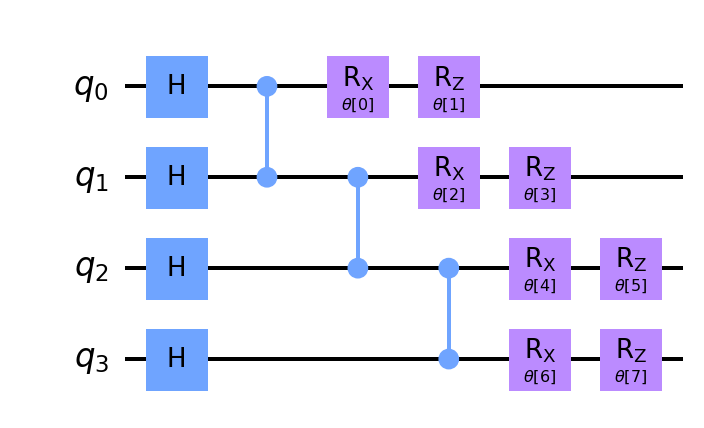

In [147]:
circ11.draw("mpl")

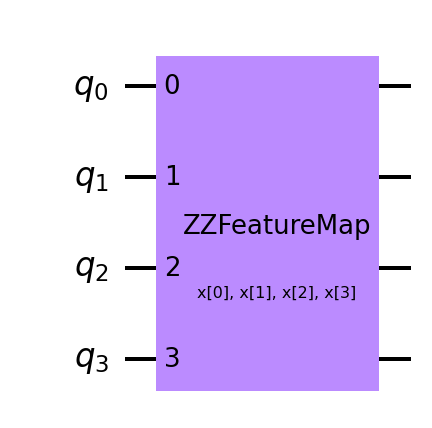

In [155]:
feature_map = ZZFeatureMap(feature_dimension=4, reps=2)
var_form = TwoLocal(4, ['ry', 'rz'], 'cz', reps=3)
feature_map.draw("mpl")

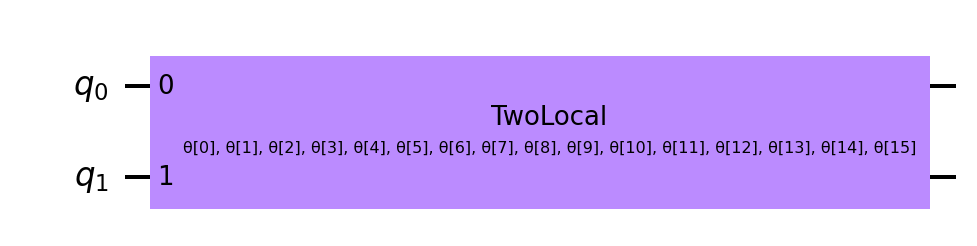

In [154]:
var_form.draw("mpl")

In [156]:
from qiskit.algorithms.optimizers import SPSA,COBYLA
from qiskit.aqua.algorithms import VQC

quantum_inst = QuantumInstance(
            Aer.get_backend('aer_simulator_statevector'), 
            shots=1024)
def call_back_vqc(eval_count, var_params, eval_val, index):
    text = "index({}): current cross entropy cost: {}".format(eval_count, eval_val)
    self.counts.append(eval_count)
    self.values.append(eval_val)
    #print(text)
        
vqc = VQC(optimizer=SPSA(maxiter=100), 
          #max_evals_grouped = 4,
          feature_map=feature_map, 
          var_form=var_form, 
          #callback=call_back_vqc, 
          training_dataset=train_data,
          test_dataset=test_data,
         quantum_instance=quantum_inst) 


In [159]:
vqc.__dict__

{'_quantum_instance': <qiskit.aqua.quantum_instance.QuantumInstance at 0x7fae87ccad60>,
 '_optimizer': <qiskit.algorithms.optimizers.spsa.SPSA at 0x7fae87cca9a0>,
 '_gradient': None,
 '_cost_fn': <bound method VQC._loss of <qiskit.aqua.algorithms.classifiers.vqc.VQC object at 0x7fae8c30f070>>,
 '_initial_point': array([-0.40831131,  0.96803907,  0.03394553, -1.59649722,  0.79268966,
        -0.53211615, -0.39208312, -0.15861422, -0.56846762, -3.10465277,
         1.49094918,  0.50941852,  0.84054255, -0.10937664, -0.04816078,
         0.54482109,  0.30195264, -0.09837823, -0.48423773, -0.40522438,
        -1.37553035, -1.21182974, -0.8782718 , -0.46669638,  0.7813722 ,
         0.02463843,  1.14260792, -0.26098648, -1.49896098, -0.8302192 ,
         2.52208829, -0.5074952 ]),
 '_var_form': <qiskit.circuit.library.n_local.two_local.TwoLocal at 0x7fae877e7250>,
 '_var_form_params': [ParameterVectorElement(θ[0]),
  ParameterVectorElement(θ[10]),
  ParameterVectorElement(θ[11]),
  Paramete

In [145]:
a = vqc.run()
print(a.__dict__)

QiskitError: 'Mismatch between run_config.parameter_binds and all circuit parameters. Parameter binds: [] Circuit parameters: [ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])]), ParameterView([ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3])])]'

In [122]:
Aer.get_backend('aer_simulator_statevector')

AerSimulator('aer_simulator_statevector')

In [67]:
from qiskit import Aer,BasicAer,QuantumCircuit
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.circuit.library import  RealAmplitudes, EfficientSU2, TwoLocal, NLocal, PauliTwoDesign,RealAmplitudes
from qiskit.aqua.components.optimizers import ADAM, SPSA, COBYLA, AQGD, TNC, SLSQP, L_BFGS_B


class DataSet(object):

    """Docstring for CrossValidation. """

    def __init__(self, data, k=None, A=0, B=1):
        """TODO: to be defined. """
        self.data = data.copy()
        self.k = k
        self.A = A
        self.B = B
        #self.C = C
        self.dataA = self.data[self.data[:,0]==self.A]
        self.dataB = self.data[self.data[:,0]==self.B]
        #self.dataC = self.data[self.data[:,0]==self.C]

    def CV(self, data):
        k = self.k
        size = len(data)
        index = np.arange(size)
        np.random.shuffle(index)
        DATA_IND={}
        ind_split = np.array_split(index, k)
        for name in range(k):
            sub = {}
            train_split = []
            for i in range(k):
                if i==name:
                    sub['test_ind'] = ind_split[i]
                else:
                    train_split.append(ind_split[i])
            sub['train_ind'] = np.hstack(train_split)
            DATA_IND.update({name: sub})
        return DATA_IND, index
    
    def data_gen(self):
        ind, _ = self.CV(self.dataA)
        for i in range(self.k):
            tr_input = {
                'A': self.dataA[ind[i]['train_ind']][:,1:],
                'B': self.dataB[ind[i]['train_ind']][:,1:]}
            te_input = {
                'A': self.dataA[ind[i]['test_ind']][:,1:],
                'B': self.dataB[ind[i]['test_ind']][:,1:]}
            te_label = (self.dataA[ind[i]['test_ind']][:,:1],
                        self.dataB[ind[i]['test_ind']][:,:1])
            yield {
                'k': i,
                'tr_input': tr_input, 
                'te_input': te_input,
                'testing_input': np.concatenate((te_input['A'], te_input['B'])),
                'testing_label': np.concatenate(te_label)
                  }



class Main(object):

    """Docstring for CrossValidation. """

    def __init__(self, shots=2048, reps=2, num_qubits=3, fm_func=None, vc_func=None, seed=10598):
        """TODO: to be defined. """
        self.shots = shots
        self.reps = reps
        self.num_qubits = num_qubits
        self.fm_func = fm_func(reps=self.reps,num_qubits=self.num_qubits)
        self.vc_func = vc_func(reps=self.reps+1,num_qubits=self.num_qubits)
        self.seed = seed
        self.counts = []
        self.values = []
        self.backend = Aer.get_backend('qasm_simulator')
        self.backend_options = {"method": "statevector", "max_parallel_threads": 0, "max_parallel_experiments": 2,"max_parallel_shots": 1}
        
    def drawfmap(self, fname):
        return self.fm_func.draw(output='mpl', filename=fname+'_fmap.jpg')
    
    def drawvmap(self, fname):
        return self.vc_func.draw(output='mpl', filename=fname+'_var_circ.jpg')
    
    def call_back_vqc(self, eval_count, var_params, eval_val, index):
        text = "index({}): current cross entropy cost: {}".format(eval_count, eval_val)
        self.counts.append(eval_count)
        self.values.append(eval_val)
        #print(text)nd, 
            shots=self.shots, 
            seed_simulator=self.seed, 
            seed_transpiler=self.seed,
            backend_options=self.backend_options)
        self.vqc = VQC(optimizer=self.opt, 
          feature_map=self.fm_func, 
          var_form=self.vc_func, 
          callback=self.call_back_vqc, 
          training_dataset=training_input,
          test_dataset=test_input) 
    
    def train(self, training_input, test_input):
        self.optimization(training_input, test_input)
        start = time.process_time()

        result = self.vqc.run(self.quantum_instance)
        #val_prob, val_labels = self.vqc.predict(val_input)
        
        print("time taken: ")
        print(time.process_time() - start)
        print(result)
        print("testing success ratio: {}".format(result['testing_accuracy']))
        return result['testing_accuracy']

In [68]:
def wrap(data, k=5, feature_map=None, opt_func=None, var_circuit=None, opt_params={}, maxiter=100, reps=2, num_qubits=3,shots=2048, callback=False):
    mds = DataSet(data, k=k, A=0, B=1)
    log = "nqubits({}), reps {}, opt_func {}:".format(
        num_qubits,
        reps,
        opt_func.__name__
    )
    print("="*80+"\n"+log)
    Accuracy = []
    plt.figure(figsize=(5,5))
    with open('result.log', 'a+') as fp:
        result_log = '#'+log+'\n'
        fp.writelines(result_log)
        for d in mds.data_gen():
            print(log+" fold {}...".format(d['k']))
            run = Main(shots=shots,
                       reps=reps, num_qubits=num_qubits, fm_func=feature_map, vc_func=var_circuit)
            run.opt = opt_func(maxiter=maxiter, **opt_params)
            acc = run.train(d['tr_input'], d['te_input'])
            fp.writelines("{}, {}\n".format(d['k'], acc))
            Accuracy.append(acc)
            count = run.counts
            vals = run.values
            plt.plot(count,vals,label='fold '+str(d['k']+1))
    plt.title('Cost value over training set')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()
    
    return np.asarray(Accuracy)

In [71]:
import matplotlib.pyplot as plt
import time

nqubits(2), reps 2, opt_func COBYLA:
nqubits(2), reps 2, opt_func COBYLA: fold 0...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =  100   F = 4.763746E-01    MAXCV = 0.000000E+00
   X =-7.049079E-01  -1.019093E-01   1.285981E+00  -3.843119E-01   6.633312E-01
       2.844083E-01   1.192779E-01  -1.980229E+00   2.362826E+00   1.363348E+00
      -1.127089E-01   1.430552E+00  -8.480372E-01  -1.818370E-01  -1.799099E+00
      -1.520080E+00
time taken: 
119.12286900000004
{'num_optimizer_evals': 100, 'min_val': 0.4763745698598763, 'opt_params': array([-0.70490791, -0.10190929,  1.28598129, -0.38431186,  0.66333124,
        0.28440827,  0.11927786, -1.98022927,  2.36282641,  1.3633484 ,
       -0.1127089 ,  1.43055244, -0.84803715, -0.18183697, -1.79909861,
       -1.52008012]), 'eval_time': 67.23564791679382, 'eval_count': 100, 'training_loss': 0.4763745698598763, 'testing_accuracy': 0.8981481481481481, 'test_success_ratio': 0.8981481481481481, 'tes

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

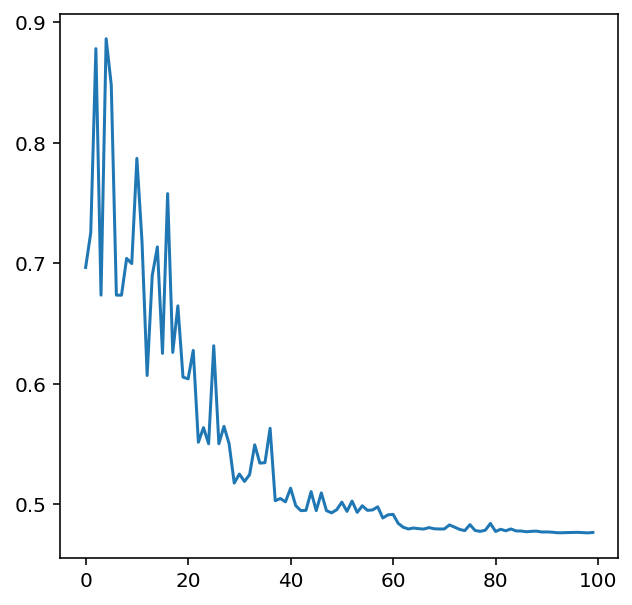

In [72]:
params = {"k":3, "maxiter":100, "num_qubits":data0.shape[1]-1, "reps":2}
params["var_circuit"] = variational_circuit1
params["opt_func"] = COBYLA
params["opt_params"] = {"disp":True, "tol":1e-6}
params["feature_map"] = feature_map_expr7
acc = wrap(data0, **params)

In [3]:
from qiskit import Aer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

seed = 10599
aqua_globals.random_seed = seed

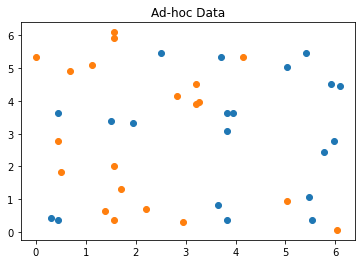

{'A': 0, 'B': 1}


In [5]:
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

feature_dim = 2
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)


In [10]:
import numpy as np
def call_back_vqc(eval_count, var_params, eval_val, index):
    counts = []
    values = []
    text = "index({}): current cross entropy cost: {},var_params: ".format(eval_count, eval_val,var_params)
    counts.append(eval_count)
    values.append(eval_val)
    print(text)
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2)
optimizer = SPSA(maxiter=40)
var_form = TwoLocal(feature_dim, ['ry', 'rz'], 'cz', reps=3)
vqc = VQC(optimizer, feature_map, var_form, training_input, test_input, datapoints[0],callback=call_back_vqc)

backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = vqc.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], vqc.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

index(0): current cross entropy cost: 0.39280440897348884,var_params: 
index(1): current cross entropy cost: 0.4854186998568256,var_params: 
index(2): current cross entropy cost: 0.5262110695109857,var_params: 
index(3): current cross entropy cost: 0.3476694330067417,var_params: 
index(4): current cross entropy cost: 0.4702431412835413,var_params: 
index(5): current cross entropy cost: 0.40770083277479935,var_params: 
index(6): current cross entropy cost: 0.43756910840134805,var_params: 
index(7): current cross entropy cost: 0.4673515070243921,var_params: 
index(8): current cross entropy cost: 0.4831789171421176,var_params: 
index(9): current cross entropy cost: 0.3863828054195978,var_params: 
index(10): current cross entropy cost: 0.43345502809081077,var_params: 
index(11): current cross entropy cost: 0.43559649230762093,var_params: 
index(12): current cross entropy cost: 0.46282931285022977,var_params: 
index(13): current cross entropy cost: 0.4145394631950805,var_params: 
index(14):

In [12]:
circ_opt = vqc.get_optimal_circuit()

In [17]:
prob = vqc.get_prob_vector_for_params()

TypeError: get_prob_vector_for_params() missing 3 required positional arguments: 'construct_circuit_fn', 'params_s', and 'quantum_instance'

In [21]:
result['opt_params']

array([ 0.90954598,  2.68677722, -1.15407773, -4.21382518, -0.61606648,
        0.45385827,  4.49734398, -1.37382899,  1.72014407, -2.67384959,
       -1.13800862, -2.67658658, -1.94559549,  0.27882289, -1.54858607,
        0.7071388 ])